In [1]:
!git clone https://github.com/phandaiduonghcb/CS114.L21

Cloning into 'CS114.L21'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 83 (delta 11), reused 55 (delta 6), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [2]:
!mv /content/CS114.L21/BTQT/17-5/wecode.csv wecode.csv
!mv /content/CS114.L21/BTQT/17-5/score_training.csv score.csv


In [3]:
!head wecode.csv

"id","assignment_id","problem_id","user_id","is_final","status","pre_score","coefficient","file_name","language_id","created_at","updated_at"
"4","0","3","4","1","SCORE","10000","100","solution-0","2","2020-10-30 10:58:11","2020-10-30 10:58:19"
"5","0","4","4","1","SCORE","10000","100","solution-1","2","2020-10-30 11:07:09","2020-10-30 11:07:17"
"6","0","5","4","0","Compilation Error","0","100","solution-2","2","2020-10-30 11:08:01","2020-10-30 11:23:36"
"7","0","5","4","0","Compilation Error","0","100","solution-3","2","2020-10-30 11:11:41","2020-10-30 11:11:42"
"8","0","5","4","0","Compilation Error","0","100","solution-4","2","2020-10-30 11:15:06","2020-10-30 11:15:07"
"9","0","5","4","0","Compilation Error","0","100","solution-5","2","2020-10-30 11:16:57","2020-10-30 11:16:58"
"10","0","6","4","1","SCORE","10000","100","solution-6","2","2020-10-30 11:18:47","2020-10-30 11:18:55"
"11","0","7","4","1","SCORE","10000","100","solution-7","2","2020-10-30 11:20:07","2020-10-30 11:20:15"


In [4]:
import sys
import csv
i=0
dic = {}
with open('wecode.csv') as csvfile:
  csv_reader = csv.reader(csvfile,delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    id = row[0]
    user_id = row[3]
    is_final = int(row[4])
    status = row[5]
    score = int(row[6])
    try:
      coef = int(row[7])
    except:
      coef = 0
    #user_id,no_compilation_error,sum_score,coef
    no_compilation_error = 0
    if status == 'Compilation Error':
      no_compilation_error +=1
    sum_score = 0
    if is_final:
      sum_score = score
    

    if user_id not in dic.keys():
      dic[user_id] = [no_compilation_error,sum_score,coef]
    else:
      arr = dic[user_id]
      arr[0]+=no_compilation_error
      arr[1]+=sum_score
      arr[2]+=coef




In [5]:
dic['4'] #Số lần compilation error, tổng điểm các assignment is_final, tổng hệ số nộp trễ các submission

[6, 370000, 5400]

<function matplotlib.pyplot.show>

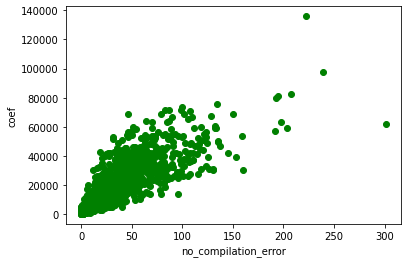

In [6]:
import matplotlib.pyplot as plt
i=0
for user_id in dic.keys():
  if i==10000:
    break
  arr = dic[user_id]
  plt.xlabel('no_compilation_error')
  plt.ylabel('coef')
  plt.scatter(arr[0],arr[2],c='g')
  i+=1
plt.show

<function matplotlib.pyplot.show>

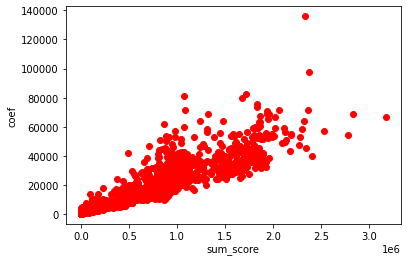

In [7]:
import matplotlib.pyplot as plt
i=0
for user_id in dic.keys():
  if i==10000:
    break
  arr = dic[user_id]
  plt.xlabel('sum_score')
  plt.ylabel('coef')
  plt.scatter(arr[1],arr[2],c='r')
  i+=1
plt.show

<function matplotlib.pyplot.show>

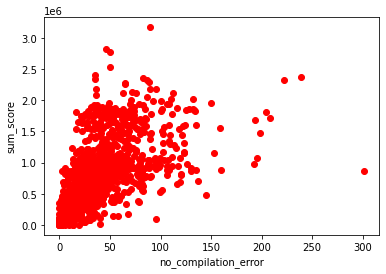

In [8]:
import matplotlib.pyplot as plt
i=0
for user_id in dic.keys():
  if i==10000:
    break
  arr = dic[user_id]
  plt.xlabel('no_compilation_error')
  plt.ylabel('sum_score')
  plt.scatter(arr[0],arr[1],c='r')
  i+=1
plt.show

In [9]:
!head score.csv

id,QT,GK,TH,CK,TBM,TBTL
22,10,9,8.5,8.5,8.8,8.52
24,10,8,10,9.5,9.4,8.41
27,10,10,10,10,10,8.67
28,10,9.5,7.5,9.5,9.2,7.39
29,10,9.5,5,8.5,8.2,8.05
30,10,10,9,9,9.3,8.63
34, , ,9,6.5, ,6.24
35,7,9.5,6,4.5,6.2,5.75
36,4.5,8,9,7,7.6,8.51


In [ ]:
X = []
X_train = []
Y_train = []

with open('score.csv') as csvfile:
  csv_reader = csv.reader(csvfile,delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    user_id = row[0]
    if user_id in dic.keys():
      arr = dic[user_id]
      try:
        cuoiki = float(row[4])
      except:
        cuoiki = 0
      arr.append(cuoiki)
      dic[user_id] = arr

for user_id in dic.keys():
  if len(dic[user_id])==3:
    X.append(dic[user_id])
  else:
    X_train.append(dic[user_id][:-1])
    Y_train.append(dic[user_id][-1])

In [12]:
X[:10]

[[6, 370000, 5400],
 [27, 969716, 23900],
 [22, 629000, 15000],
 [13, 370000, 5500],
 [39, 908173, 23100],
 [119, 1073263, 59600],
 [39, 826937, 25500],
 [43, 575000, 12900],
 [25, 458666, 10100],
 [42, 1323982, 43677]]

In [13]:
X_train[:10]

[[55, 824256, 26800],
 [25, 939166, 21600],
 [91, 948180, 42000],
 [25, 972744, 23900],
 [46, 984714, 24700],
 [21, 1093250, 35200],
 [50, 1085241, 41300],
 [23, 1042644, 29200],
 [89, 1038888, 24600],
 [26, 1054068, 25500]]

In [14]:
Y_train[:10]

[8.5, 8.5, 7.5, 9.0, 8.5, 8.0, 7.0, 9.0, 2.5, 8.0]